# Monte Carlo simulation of Next-Nearest-Neighbour (nnn) Ising Model

In [1]:
import ising_tools as it
%load_ext autoreload
%autoreload 2

In [7]:
test_spins = it.ising_main_flipbook(300, 37, 2.0)

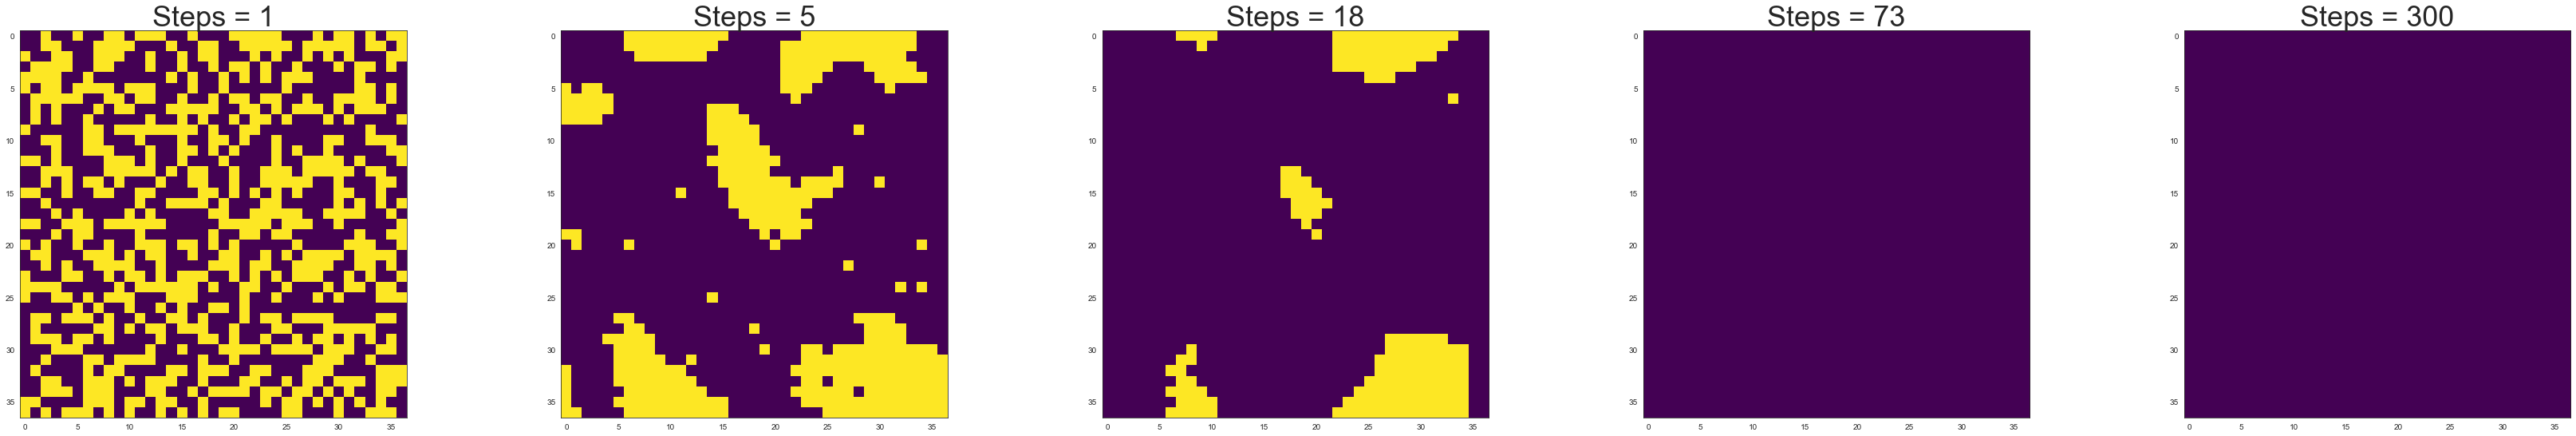

In [8]:
it.check_mc_steps(test_spins, checks = 5)

In [6]:
MCs_temp = 500
L_temp = 70

In [7]:
temp_spins = it.make_temperature_spins(MCs_temp, L_temp, 0.5, 10, 100, state = 1)

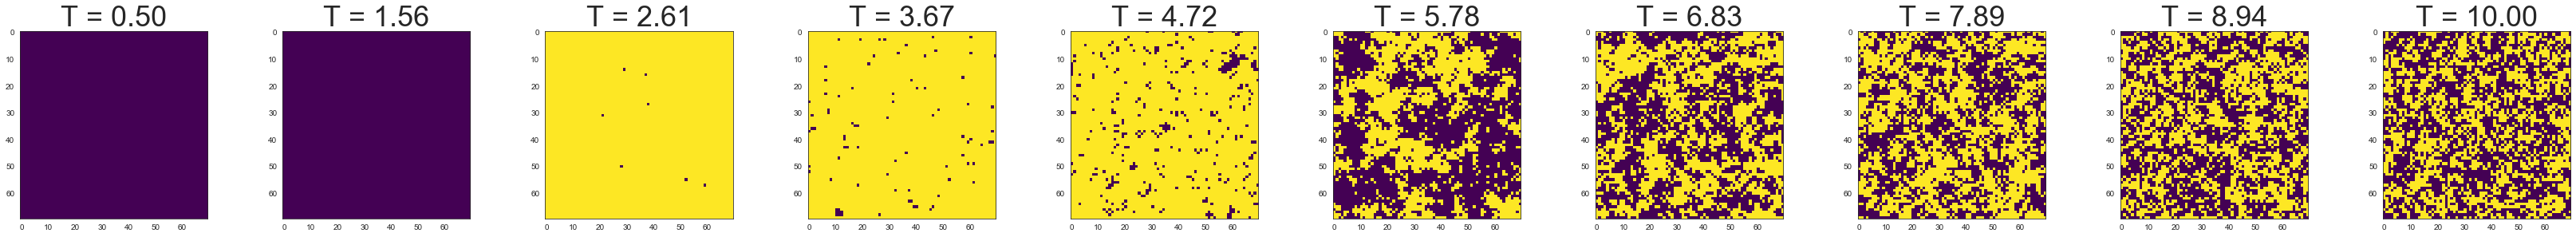

In [8]:
it.check_mc_temps(temp_spins, 0.5, 10, 100, checks = 10)

Notice the symmetry breaking for $T < T_c$. When the system starts from a disordered (random) configuration and moves towards an ordered one, it will "choose" to go into $m = +1$ or $m = -1$. To avoid this, we could have started with a homogeneous configuration of spins and chosen $m = 1$. At $T > T_c$, the Monte Carlo algorithm would have still made it disordered, provided we let it run for enough steps.

# Calculation of various other values

For this, we need our array of spins to include:
- 2d grid representing our spins ($\pm 1$)
- additional axis corresponding to MC time (number of steps)
- final axis corresponding to temperature

## Justification of Grid size ($L$) and Monte Carlo Steps ($MCs$) and importance of finite-size effects

### $L$ and finite-size effects
We want $L$ to be big enough so as to mitigate so-called *boundary effects*, but we also need it to be computationally feasible. What we want to avoid with finite size models is the idea that a spin can come back to affect itself. Picture a spin in the $S_i = +1$ state. The Hamiltonian of the system tells us that all neighbouring spins will "want" to have similar spins so as to minimize energy. Same goes for the spins neighbouring those neighbours, etc. Due to our periodic boundary conditions, it is thus possible (and inevitable) that a spin affects itself. A good way to quantify what we mean is via the correlation length, $\xi$. This parameter tells us when the correlation of two spins drops to $1/e$ of its maximal value ($1$). If our grid size is 7 correlation lengths, then a spin will have a sub $0.01$ correlation with itself. Moreover, Malsagov et. al (https://arxiv.org/pdf/1706.02541.pdf) tells us that the maximal correlation length in 2-D Ising models is of order $O(1)$. To be conservative, let's take $\xi_{max}$ to be $10$. By setting our grid size to $7 \times \xi_{max}$ we will achieve a "self-correlation" of below $0.01$. Thus, we set our grid size to $\mathbf{L = 80}$ to be extra safe, and drive this point home.

### $MCs$

Here again there is a trade off. We need $MCs$ to be large enough to counter the bias of the initial state by exploring a reasonably large sample space, but we still need it to be small enough to be computationally feasible. To quantify what we mean when we say "bias of the initial state", consider a MC simulation with a disordered initial state (`param state = 0`) set to operate in $T < T_c$. If the number of $MCs$ is too small, the system will not have enough MC time to explore a large sample space. At the end, it will still be disordered, even though it should, by definition of $T_c$, be ordered. Vice-versa for an initial ordered state at $T > T_c$. So, we need $MCs$ to be large, but small enough that we are able to run it. After some trial and error, I find that $\mathbf{MCs = 500}$ does the trick.

# $m (T)$

In [9]:
# we will use these to plot other values
# so it is worth "going big"
MCs_total = 500
L_total = 80
T_start = 0.5
T_end = 10
T_num = 100

In [10]:
total_spins, energies = it.make_total_spins_energy(MCs_total, L_total, T_start, T_end, T_num, state = 0)

In [11]:
total_spins_plus1, energies_plus1 = it.make_total_spins_energy(MCs_total, L_total, T_start, 
                                                               T_end, T_num, state = 1)

In [12]:
total_spins_minus1, energies_minus1 = it.make_total_spins_energy(MCs_total, L_total, T_start, 
                                                                 T_end, T_num, state = -1)

In [13]:
m_T = it.make_m_T(total_spins, T_start, T_end, T_num)
m_T_plus1 = it.make_m_T(total_spins_plus1, T_start, T_end, T_num)
m_T_minus1 = it.make_m_T(total_spins_minus1, T_start, T_end, T_num)

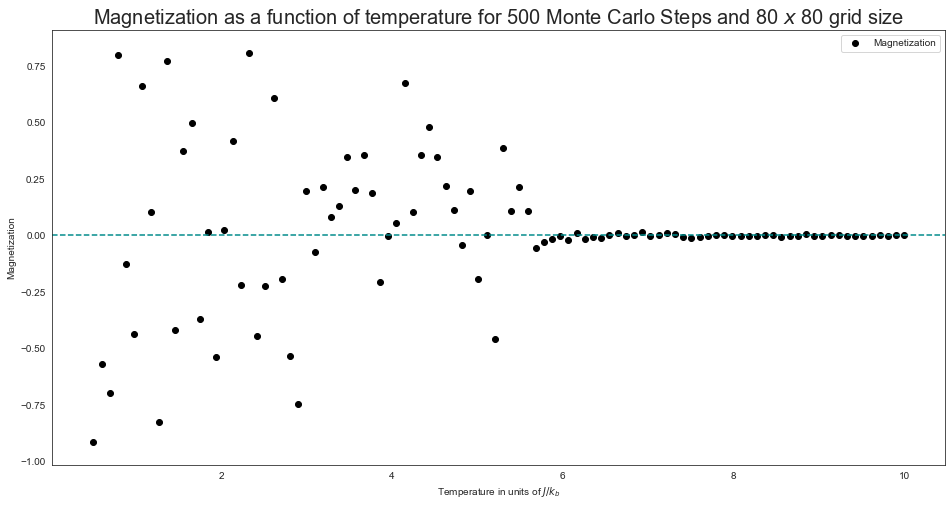

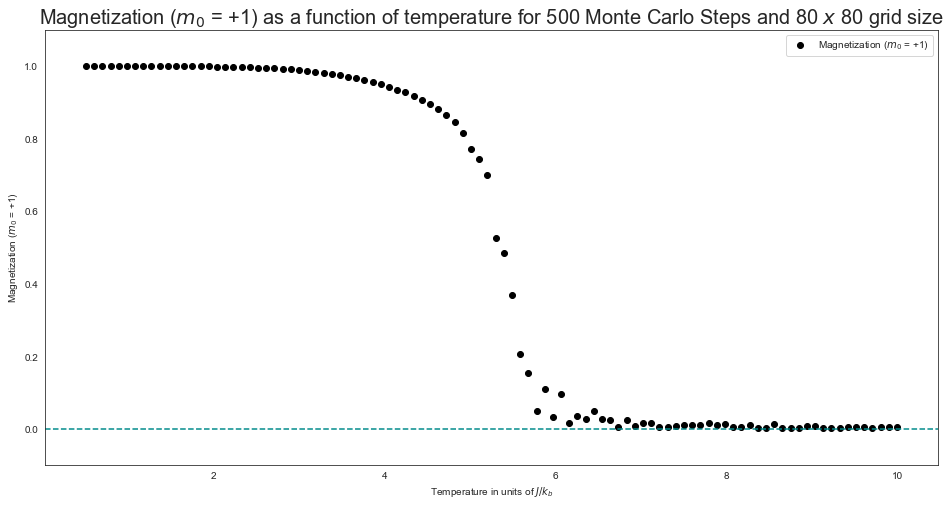

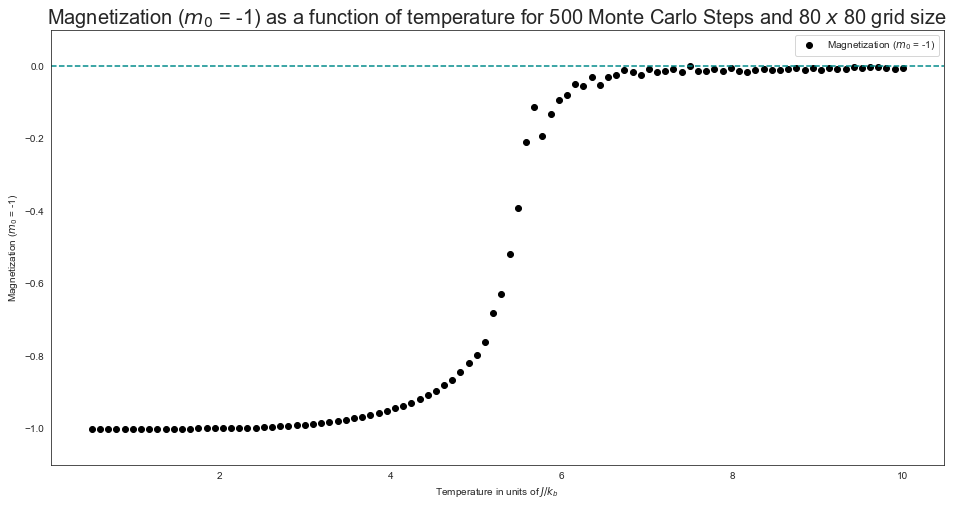

In [14]:
# plot m_T as a function of temperature
it.plot_vs_temps(m_T, "Magnetization", MCs_total, L_total, T_start, T_end, T_num)
it.plot_vs_temps(m_T_plus1, "Magnetization ($m_0$ = +1)", MCs_total, L_total, T_start, T_end, T_num)
it.plot_vs_temps(m_T_minus1, "Magnetization ($m_0$ = -1)", MCs_total, L_total, T_start, T_end, T_num)

# $ e (T)$

In [15]:
e_T = it.make_energy_per_spin(energies, L_total)
e_T_plus1 = it.make_energy_per_spin(energies_plus1, L_total)
e_T_minus1 = it.make_energy_per_spin(energies_minus1, L_total)

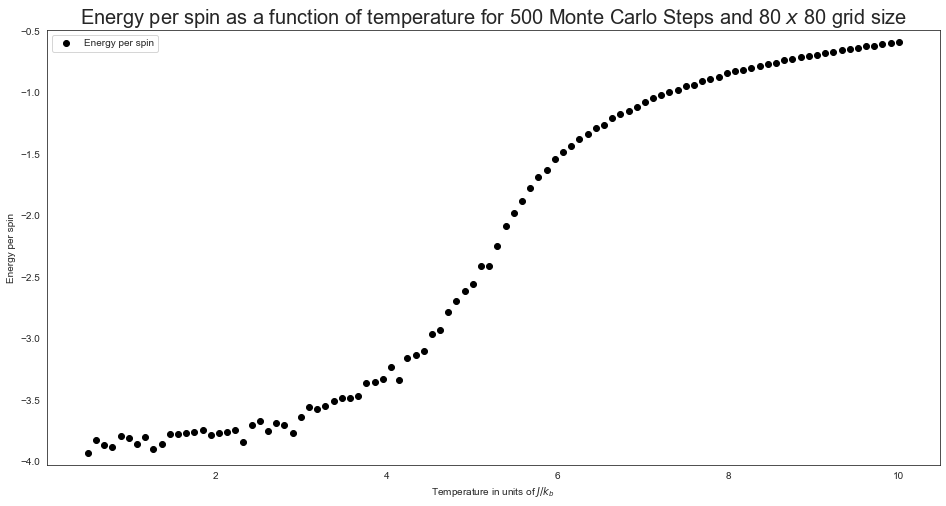

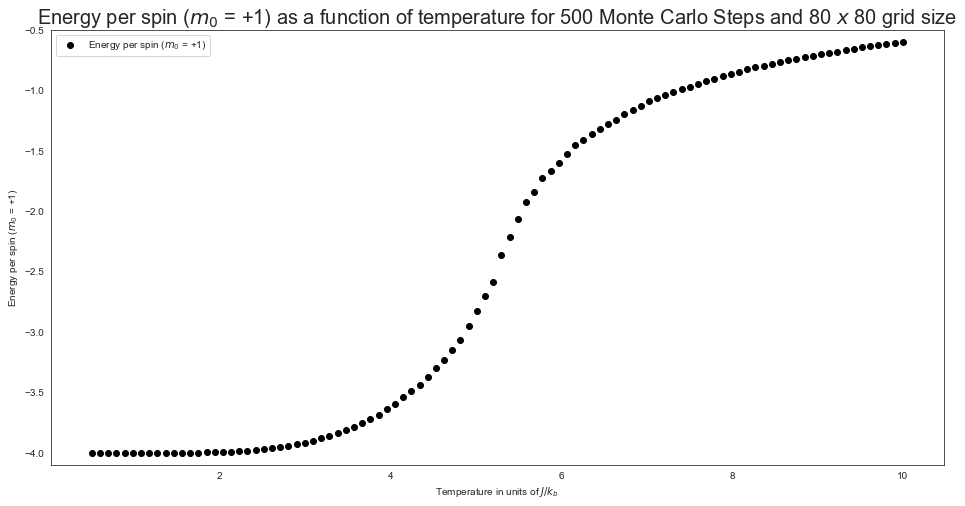

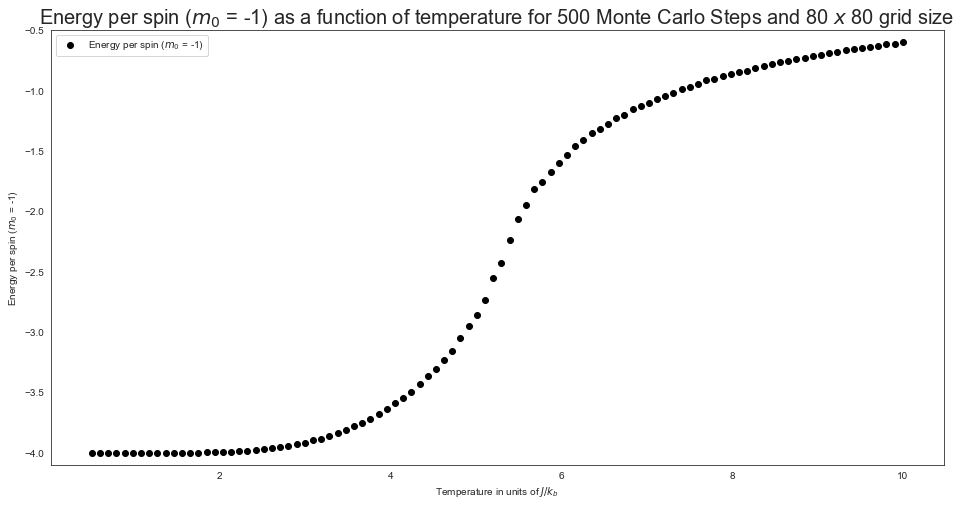

In [16]:
it.plot_vs_temps(e_T, "Energy per spin", MCs_total, L_total, T_start, T_end, T_num)
it.plot_vs_temps(e_T_plus1, "Energy per spin ($m_0$ = +1)", MCs_total, L_total, T_start, T_end, T_num)
it.plot_vs_temps(e_T_minus1, "Energy per spin ($m_0$ = -1)", MCs_total, L_total, T_start, T_end, T_num)

# $ C_V (T) $

In [17]:
Cv_T = it.make_heat_capacity(e_T, T_start, T_end, T_num)
Cv_T_plus1 = it.make_heat_capacity(e_T_plus1, T_start, T_end, T_num)
Cv_T_minus1 = it.make_heat_capacity(e_T_minus1, T_start, T_end, T_num)

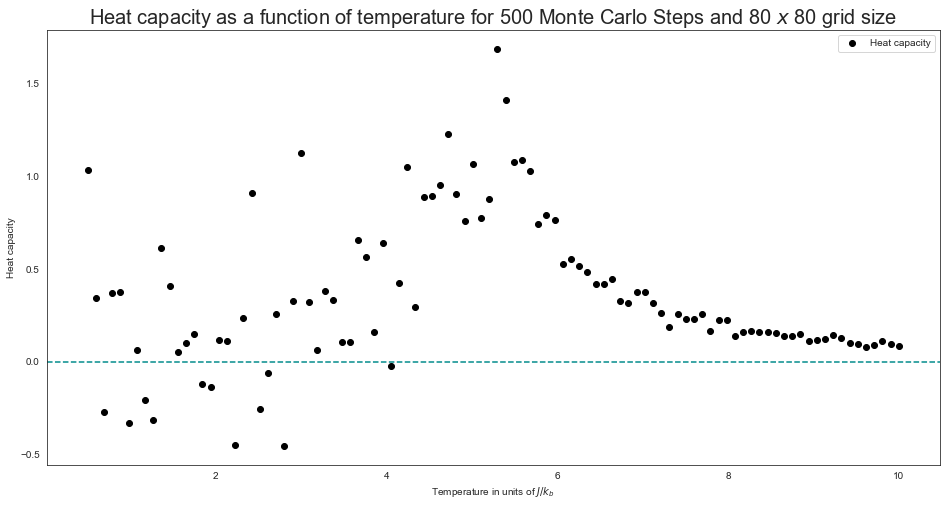

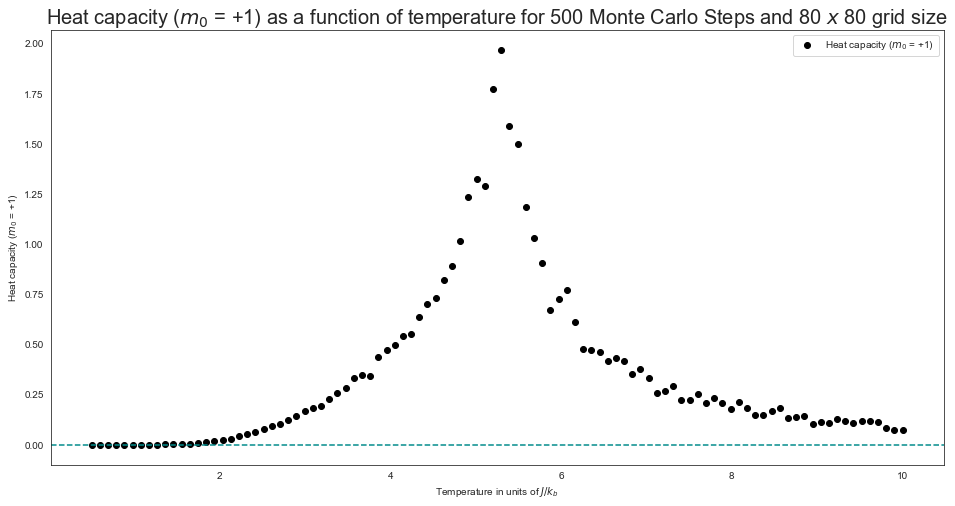

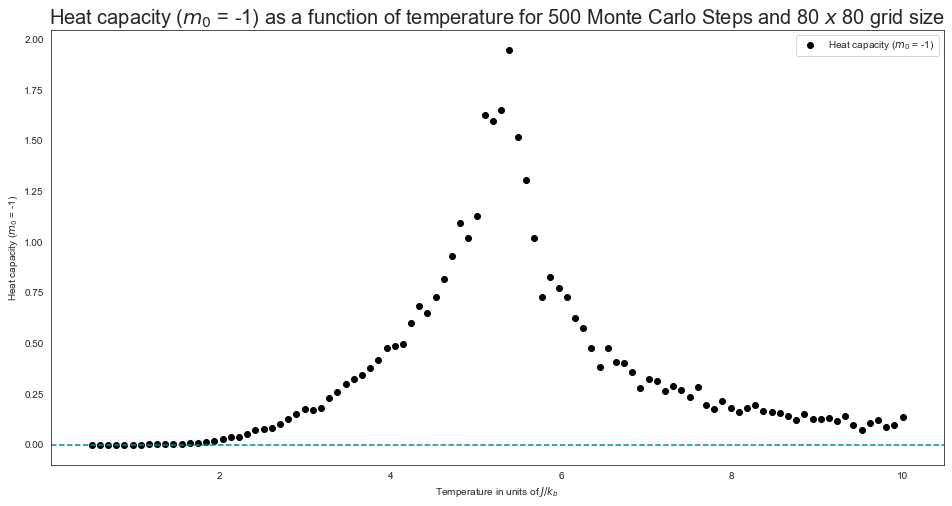

In [18]:
it.plot_vs_temps(Cv_T, "Heat capacity", MCs_total, L_total, T_start, T_end, T_num)
it.plot_vs_temps(Cv_T_plus1, "Heat capacity ($m_0$ = +1)", MCs_total, L_total, T_start, T_end, T_num)
it.plot_vs_temps(Cv_T_minus1, "Heat capacity ($m_0$ = -1)", MCs_total, L_total, T_start, T_end, T_num)

# $ T_c $
In order to fit the values to the exponents.

In [19]:
Tc_0 = it.critical_temperature(energies, L_total, T_start, T_end, T_num)
Tc_plus1 = it.critical_temperature(energies_plus1, L_total, T_start, T_end, T_num)
Tc_minus1 = it.critical_temperature(energies_minus1, L_total, T_start, T_end, T_num)

In [20]:
Tc_avg = Tc_0 + Tc_plus1 + Tc_minus1
Tc_avg /= 3

In [21]:
print("Critical temperature estimate: T_c = {:.3}".format(Tc_avg))

Critical temperature estimate: T_c = 5.33


# Critical exponents $\alpha$ and $\beta$

Estimated critical exponent = 0.263 +/- 0.02


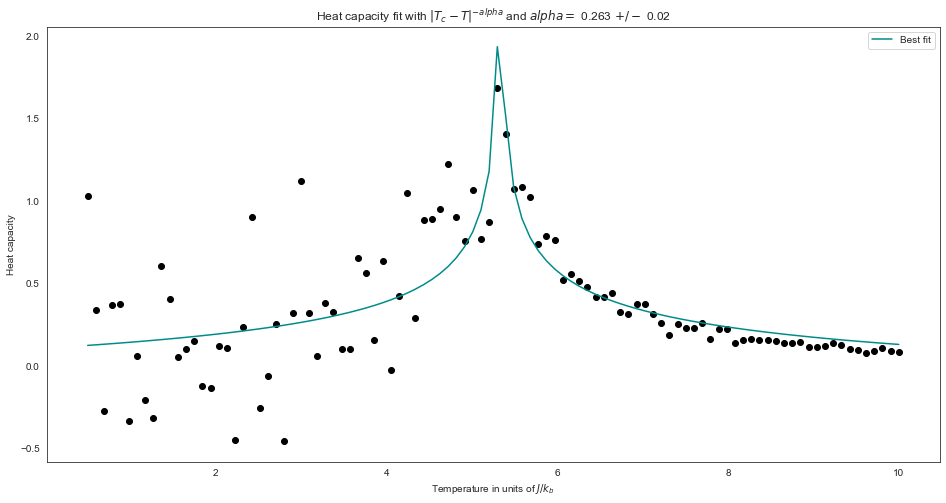

Estimated critical exponent = 0.322 +/- 0.009


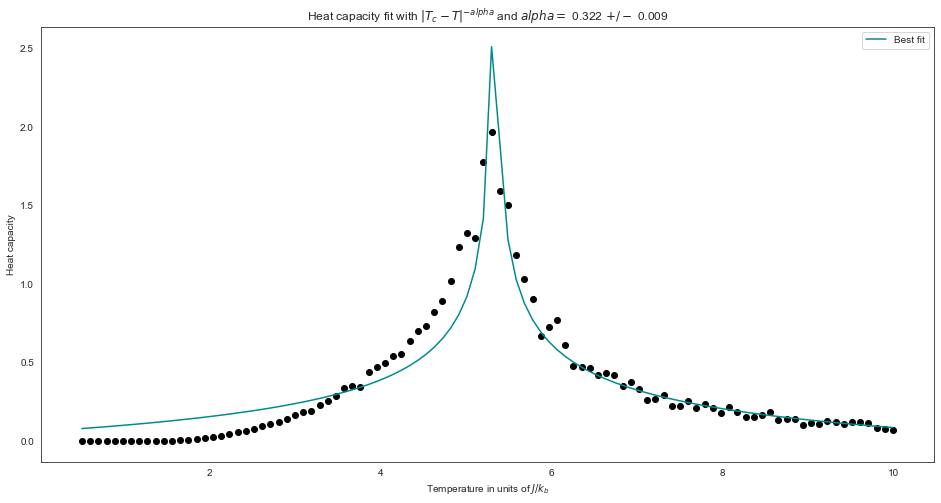

Estimated critical exponent = 0.318 +/- 0.01


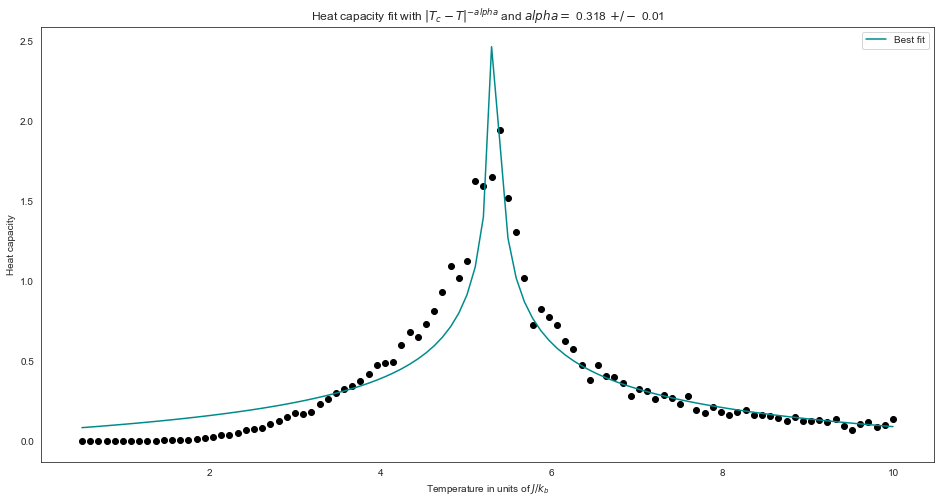

In [22]:
alpha, alpha_err, best_fit_cv = it.get_cv_exponent(Cv_T, Tc_avg, T_start, T_end, T_num)
alpha_plus1, alpha_err_plus1, best_fit_cv_plus1 = it.get_cv_exponent(Cv_T_plus1, Tc_avg, T_start, T_end, T_num)
alpha_minus1, alpha_err_minus1, best_fit_cv_minus1 = it.get_cv_exponent(Cv_T_minus1, Tc_avg, T_start, T_end, T_num)

Estimated critical exponent = 0.142 +/- 0.003


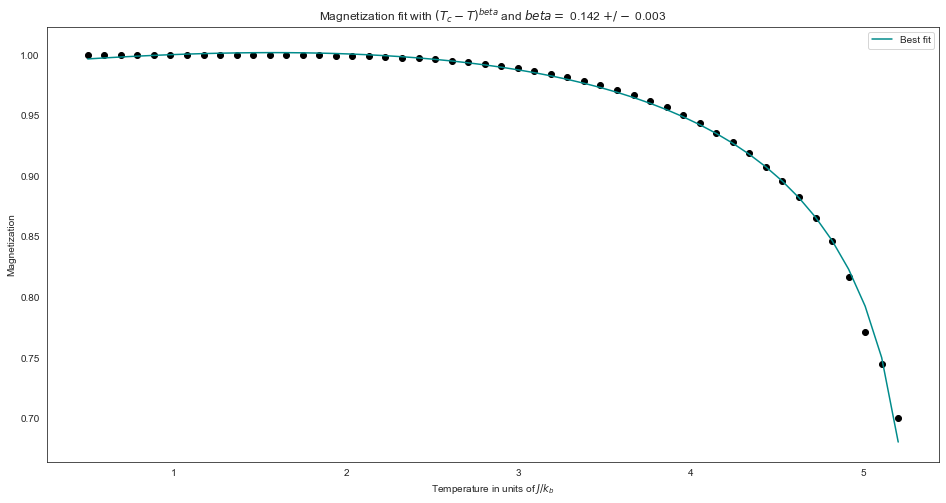

Estimated critical exponent = 0.142 +/- 0.003


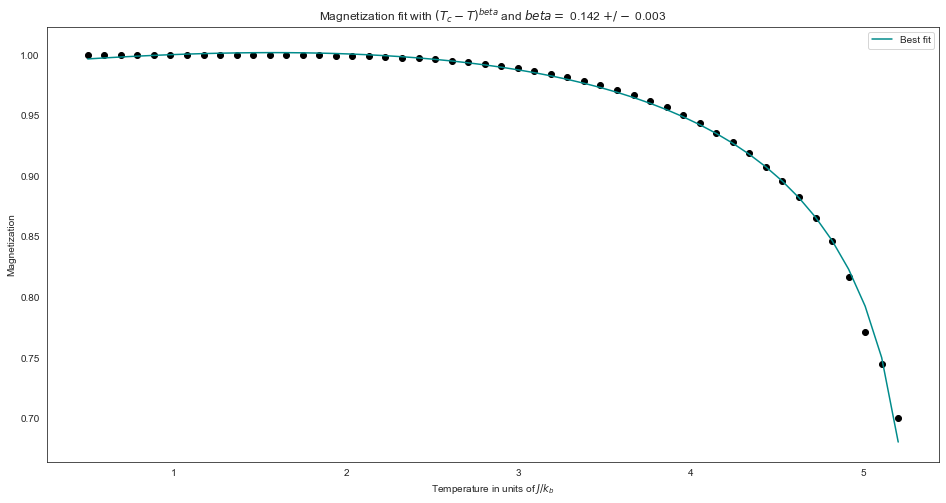

Estimated critical exponent = -0.124 +/- 0.002


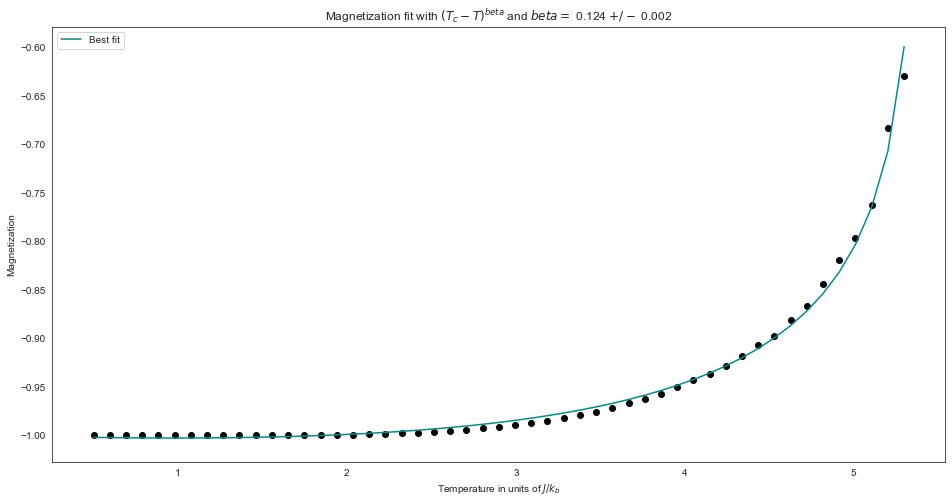

In [23]:
beta, beta_err, best_fit_m = it.get_m_exponent(m_T_plus1, Tc_0, T_start, T_end, T_num)
beta_plus1, beta_err_plus1, best_fit_m_plus1 = it.get_m_exponent(m_T_plus1, Tc_plus1, T_start, T_end, T_num)
beta_minus1, beta_err_minus1, best_fit_m_minus1 = it.get_m_exponent(m_T_minus1, Tc_minus1, T_start, T_end, T_num)

# Plot of $m$ and $C_V$ as a function of $T$

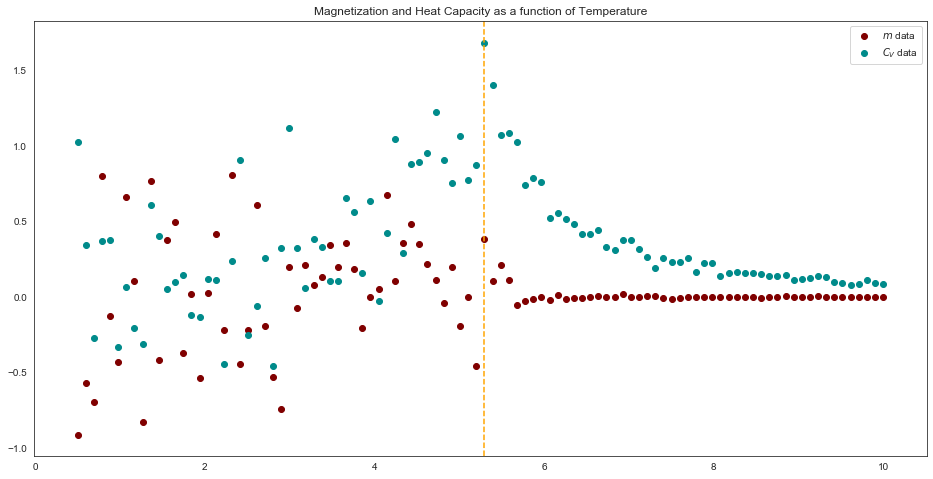

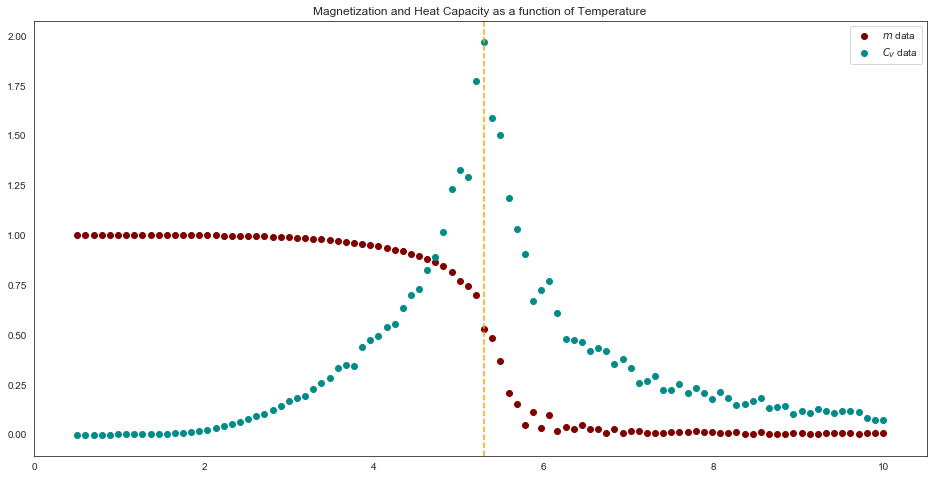

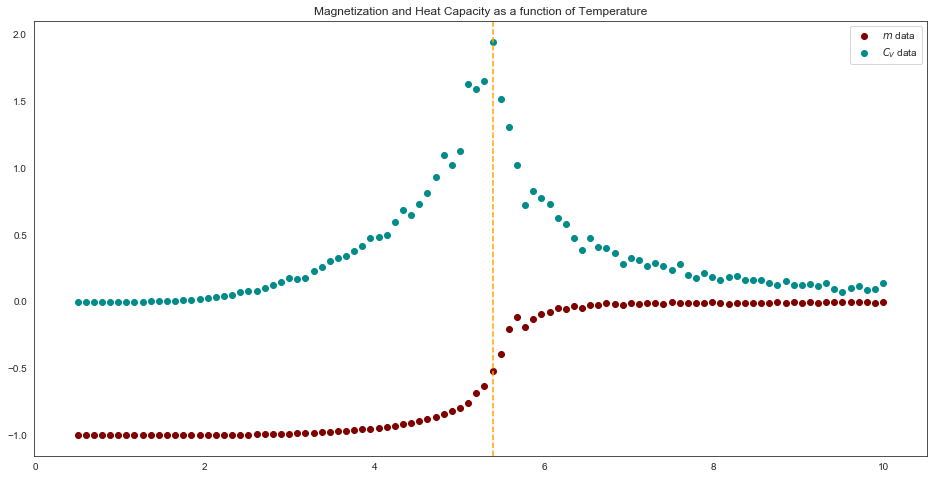

In [24]:
it.plot_m_and_cv(m_T, Cv_T, Tc_0, T_start, T_end, T_num)
it.plot_m_and_cv(m_T_plus1, Cv_T_plus1, Tc_plus1, T_start, T_end, T_num)
it.plot_m_and_cv(m_T_minus1, Cv_T_minus1, Tc_minus1, T_start, T_end, T_num)